# HR Analytics Project

### Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

#### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

#### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

#### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

### Importing Libraries

In [1]:
import pandas  as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import scipy as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

The above dataset is the details of the employees working in an organization. Our Dataset contains 1470 rows and 35 columns. Column name 'Attrition' is our target variable.Dataset contains both dependent and independent variables and also contains both categorical and numerical data. As our target variable has two classes 'Yes' or 'No', so this is a "Classification type" problem.

## Exploratory Data Analysis (EDA)

In [4]:
# To get overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

From above dataset, we can see 26 columns have integer data types while 9 column having object datatypes. We need to apply encoding technique to change the object datatypes to numeric value. There seems to be no null values in our data set.

In [5]:
# Checking count of null values from the dataset.
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

From above, we can see that there are no missing values in the dataset.

<AxesSubplot:>

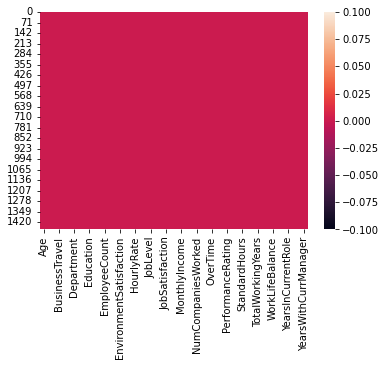

In [6]:
# Let's visualize the null values clearly through Heatmap
sns.heatmap(df.isnull())

In [7]:
# Statistical summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


Above is the Satistical description of the dataset. From above description, for few coloums, we can see minimum value is 0. 
For coloumns like DailyRate, Employeenumber, MonthlyIncome, MonthlyRate - maximum value is more that total count. Also Standard Deviation is quite high.
Looking at these values, Outliers are present in the dataset.

Few columns hase single value, we will check the unique count and may drop these columns.

In [8]:
#Let's check the unique values
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Looking at the Unique values and Descriptive statistics, we can drop unwanted columns like EmployeeCount, EmployeeNumber, Over18 and StandardHours.    

In [3]:
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

In [10]:
df.shape

(1470, 31)

Now Let's separate the Numerical and Catagorical columns

In [4]:
Catg_data = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        Catg_data.append(x)
Catg_data

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

Above are the 8 columns that having Object datatype.

In [5]:
Num_data = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'int64':
        Num_data.append(x)
Num_data

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Above are the 23 columns that having integer datatype.

## Data Visualisation

#### Univariate Analysis

No     1233
Yes     237
Name: Attrition, dtype: int64


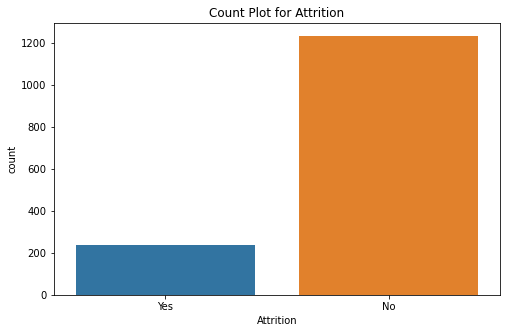

In [14]:
#Checking the count plot of Target variable
print(df["Attrition"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(df["Attrition"])
plt.title(f"Count Plot for Attrition")
plt.show()

By looking at the above countplot, we can see data is highly imbalanced. We need to balance the data before proceeding for Model building

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


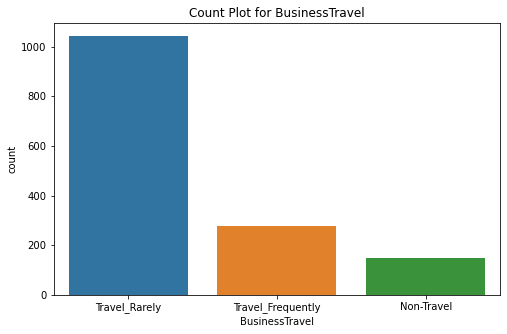

In [15]:
#Checking the count plot for BusinessTravel
print(df["BusinessTravel"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(df["BusinessTravel"])
plt.title(f"Count Plot for BusinessTravel")
plt.show()

Looking at the above table, maximum no is for Travel_Rarely.

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


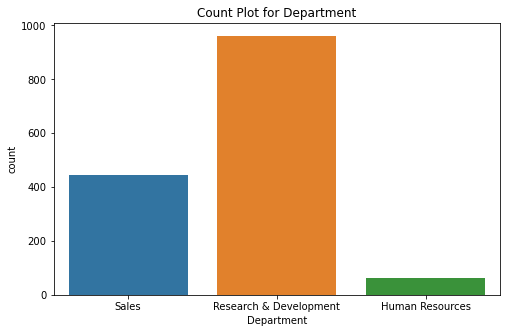

In [16]:
#Checking the count plot for Department
print(df["Department"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(df["Department"])
plt.title(f"Count Plot for Department")
plt.show()

Most of the employee from Research & Development Department while 446 is from Sales and remaining only 63 is from Human Resources department

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


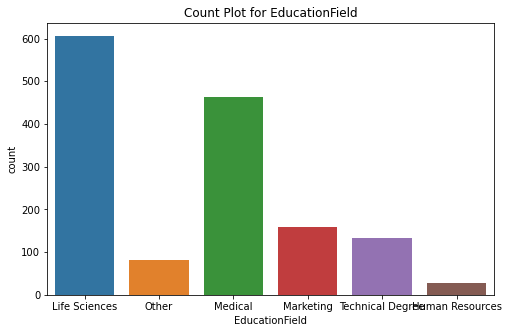

In [17]:
#Checking the count plot for EducationField
print(df["EducationField"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(df["EducationField"])
plt.title(f"Count Plot for EducationField")
plt.show()

Most of the employee are from Life Science background followed by Medical. Human Resource has the lowest number.

Male      882
Female    588
Name: Gender, dtype: int64


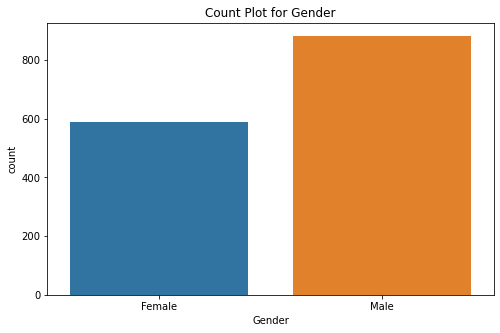

In [18]:
#Checking the count plot for Gender
print(df["Gender"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(df["Gender"])
plt.title(f"Count Plot for Gender")
plt.show()

Male employees are higher in number than the female employees.

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


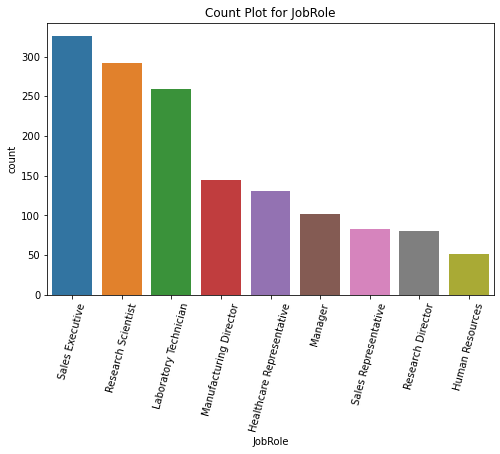

In [20]:
#Checking the count plot for JobRole
print(df["JobRole"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(df["JobRole"])
plt.title(f"Count Plot for JobRole")
plt.xticks(rotation=75)
plt.show()

Sales Executive are higher in number followed by Research Scientist, Laboratory Technician etc.

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


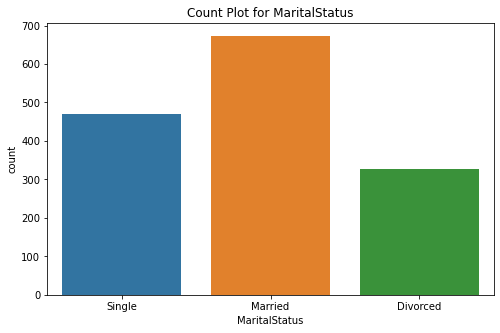

In [21]:
#Checking the count plot for MaritalStatus
print(df["JobRole"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(df["MaritalStatus"])
plt.title(f"Count Plot for MaritalStatus")
plt.show()

Married employee are more in numbers.

No     1054
Yes     416
Name: OverTime, dtype: int64


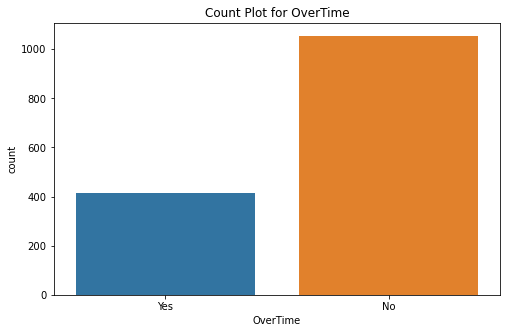

In [22]:
#Checking the count plot for OverTime
print(df["OverTime"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(df["OverTime"])
plt.title(f"Count Plot for OverTime")
plt.show()

Most of the employees are working during regular working hrs. Only 416 no of employees are doing Overtime.

#### Bivariate Analysis

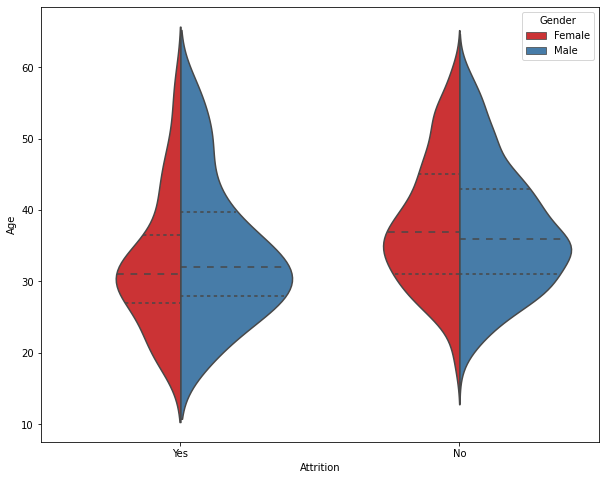

In [28]:
# Comparing Age of the employee with Attirition
plt.figure(figsize=(10,8))
sns.violinplot(x="Attrition", y="Age", hue="Gender", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

From above we can see that employee age 20 and 30's have more attrition rate

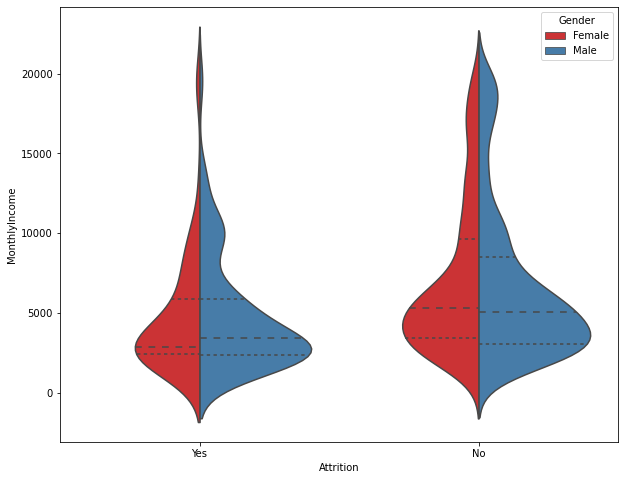

In [27]:
# Comparing Monthly salary of the employee with Attirition
plt.figure(figsize=(10,8))
sns.violinplot(x="Attrition", y="MonthlyIncome", hue="Gender", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

Attrition rate is high for employee monthly income within 5000

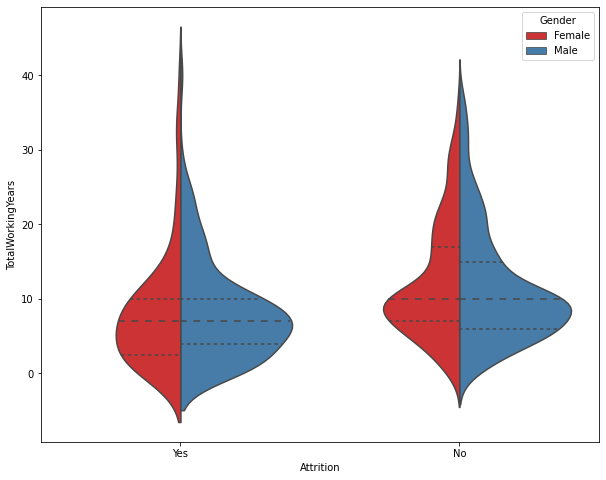

In [26]:
# Comparing Work experiencey of the employee with Attirition
plt.figure(figsize=(10,8))
sns.violinplot(x="Attrition", y="TotalWorkingYears", hue="Gender", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

Less than 10 yrs of employee have higher Attrition rate.

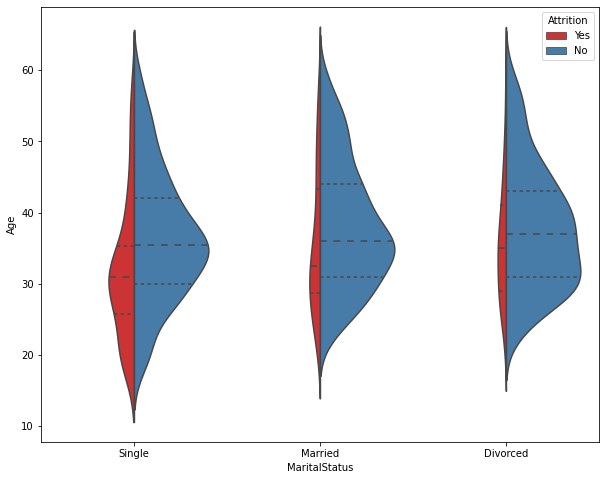

In [30]:
# Comparing MaritalStatus of the employee with Attirition
plt.figure(figsize=(10,8))
sns.violinplot(x="MaritalStatus", y="Age", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

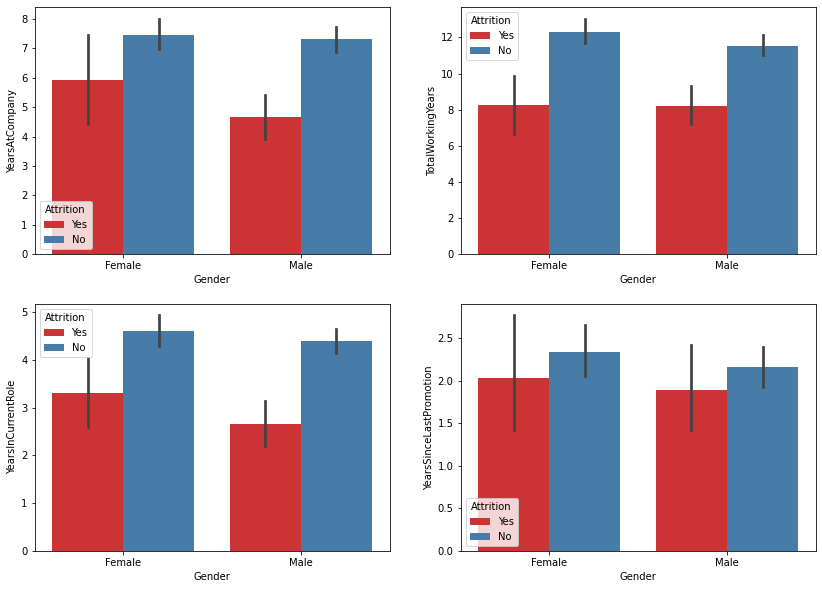

In [32]:
fig,axes=plt.subplots(2,2,figsize=(14,10))

# Checking attrition level in YearsAtCompany
sns.barplot(x='Gender',y='YearsAtCompany',ax=axes[0,0],data=df,hue='Attrition',palette="Set1")

# Checking attrition level in TotalWorkingYears
sns.barplot(x='Gender',y='TotalWorkingYears',ax=axes[0,1],data=df,hue='Attrition',palette="Set1")

# Checking attrition level in YearsInCurrentRole
sns.barplot(x='Gender',y='YearsInCurrentRole',ax=axes[1,0],data=df,hue='Attrition',palette="Set1")

# Checking attrition level in YearsSinceLastPromotion
sns.barplot(x='Gender',y='YearsSinceLastPromotion',ax=axes[1,1],data=df,hue='Attrition',palette="Set1")
plt.show()

Femle Employee has higher attrition rate when i comes to Yesrs at the complany and with current role. 

Total Working Years of female employees is more than the male employees.

The female employees spend more years since their last promotion than male.



## Encoding Catagorical Data

In [6]:
Catg_data

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

We will use Label encoder

In [6]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[Catg_data]= df[Catg_data].apply(LE.fit_transform)

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


Now all object type data is converted to numerical format.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

### Correlation using HEAT map

In [7]:
cor = df.corr()
cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together. 

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

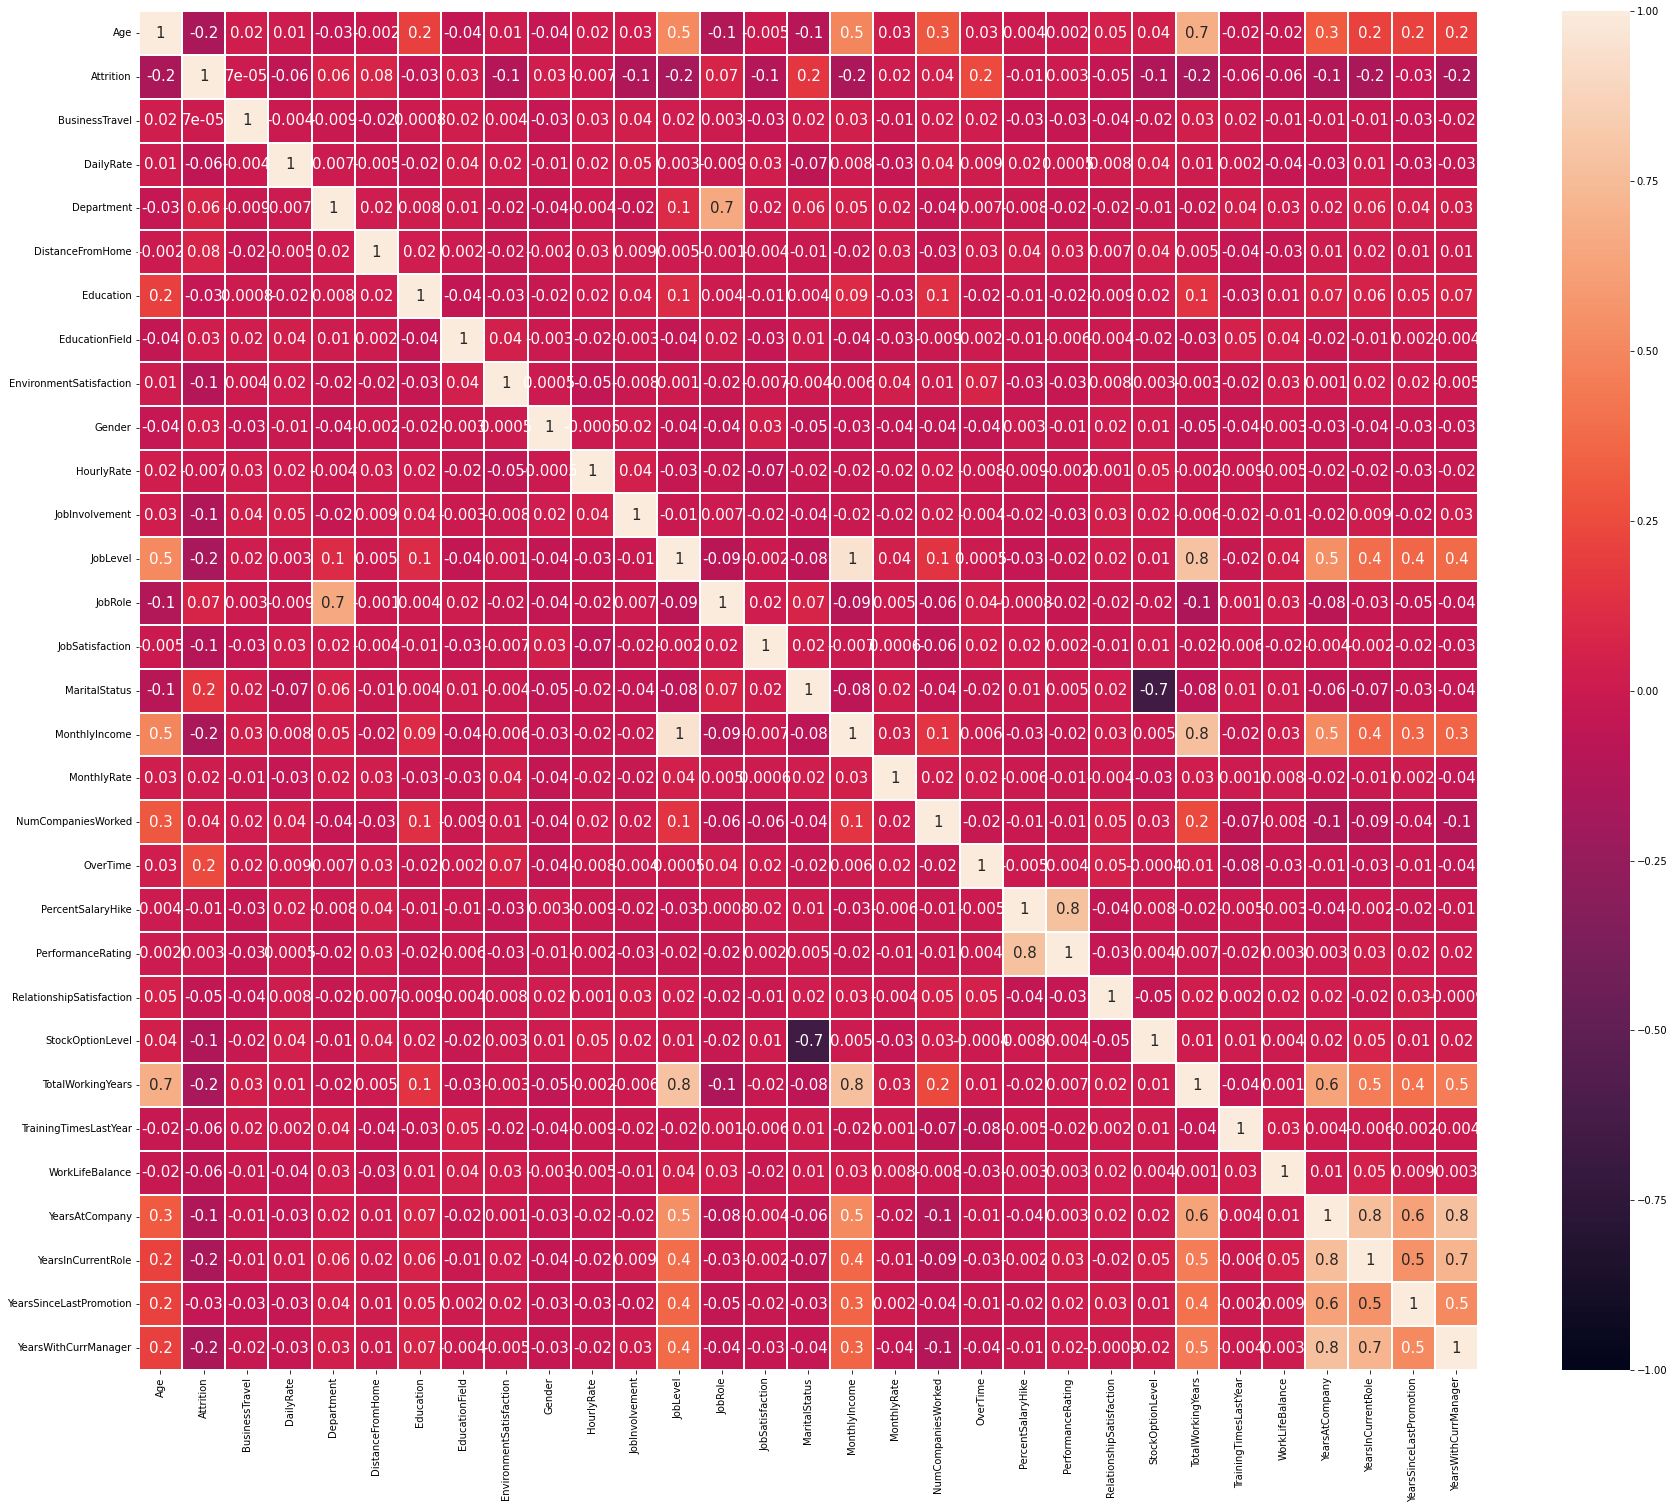

In [49]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, annot_kws={'size':15})
plt.yticks(rotation=0);

From above Heat map, we can see that Traget variable 'Attrition' has both positive and negative correlation. Couldn't see much many multicolleniarity between features.

## Outliers

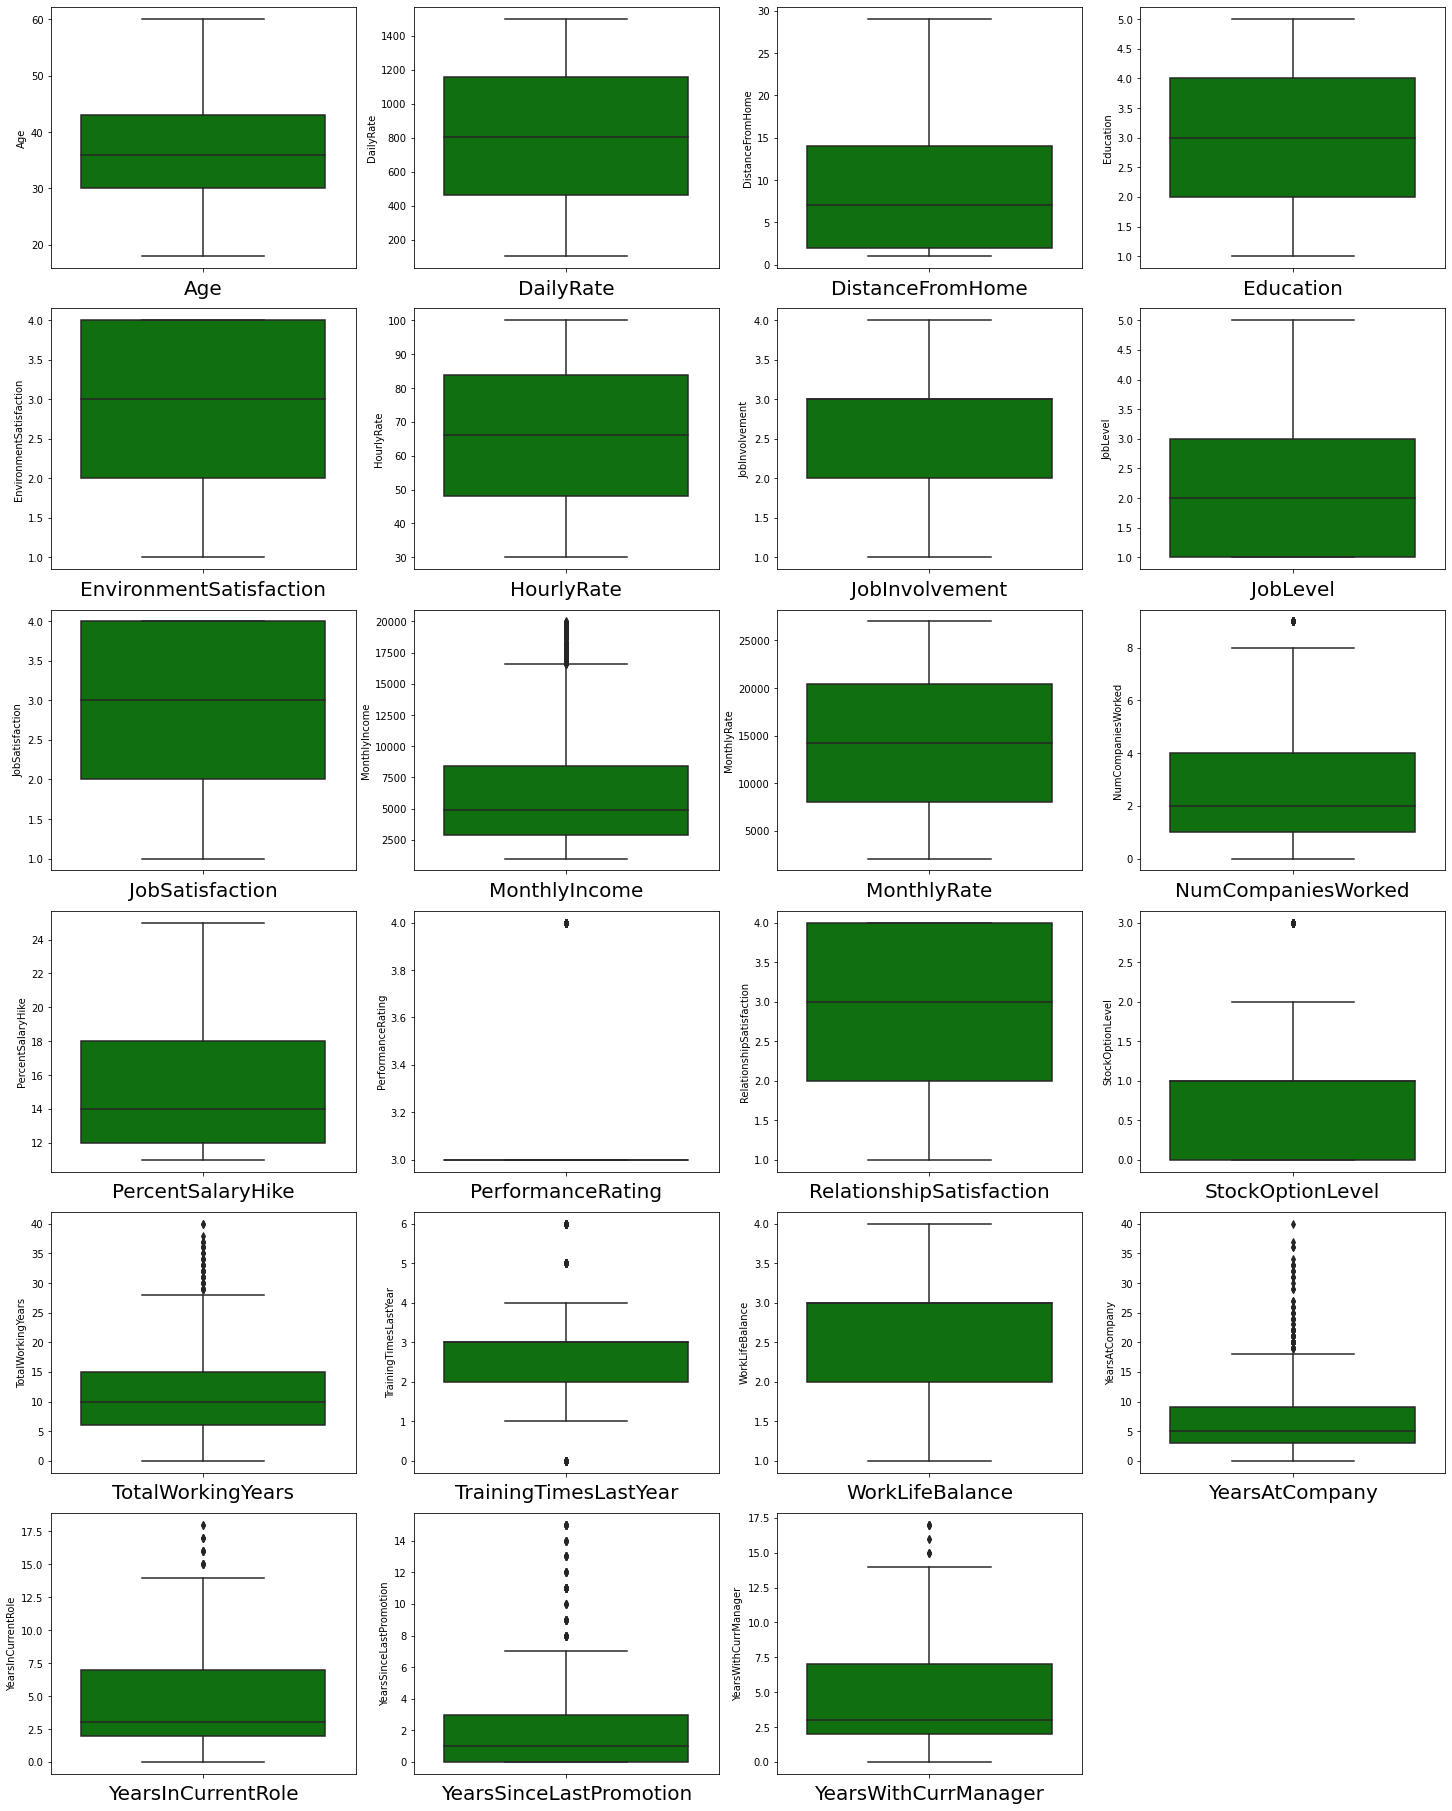

In [11]:
#Let's check the Outliers through Boxplot

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Num_data:
    if plotnumber<=23:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(y=column, data=df,color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

Above is the box plot of Numerical data. From above Box plot we can see major outliers present in columns like MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager. We need to treat this Outliers.

#### Removing outliers using Zscore

In [7]:
# Features containing outliers
df1 = df[['MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]


In [8]:
# Using zscore to remove outliers in the feature newpaper
from scipy.stats import zscore

z=np.abs(zscore(df1))

# Creating new dataframe
new_df=df[(z<3).all(axis=1)]
new_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [14]:
df.shape

(1470, 31)

In [15]:
new_df.shape

(1387, 31)

In [16]:
# Let's check the the data loss
data_loss = (1470-1387)/1470*100
data_loss

5.646258503401361

In [9]:
df=new_df.copy() # Reassigning the changed dataframe name to our original dataframe name

### Skewness

In [18]:
# Checking the skewness
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

From above table, we can see some skewness on few features as value is showing more than acceptable range of +/- 0.5. Let's visualise this through Dist plot

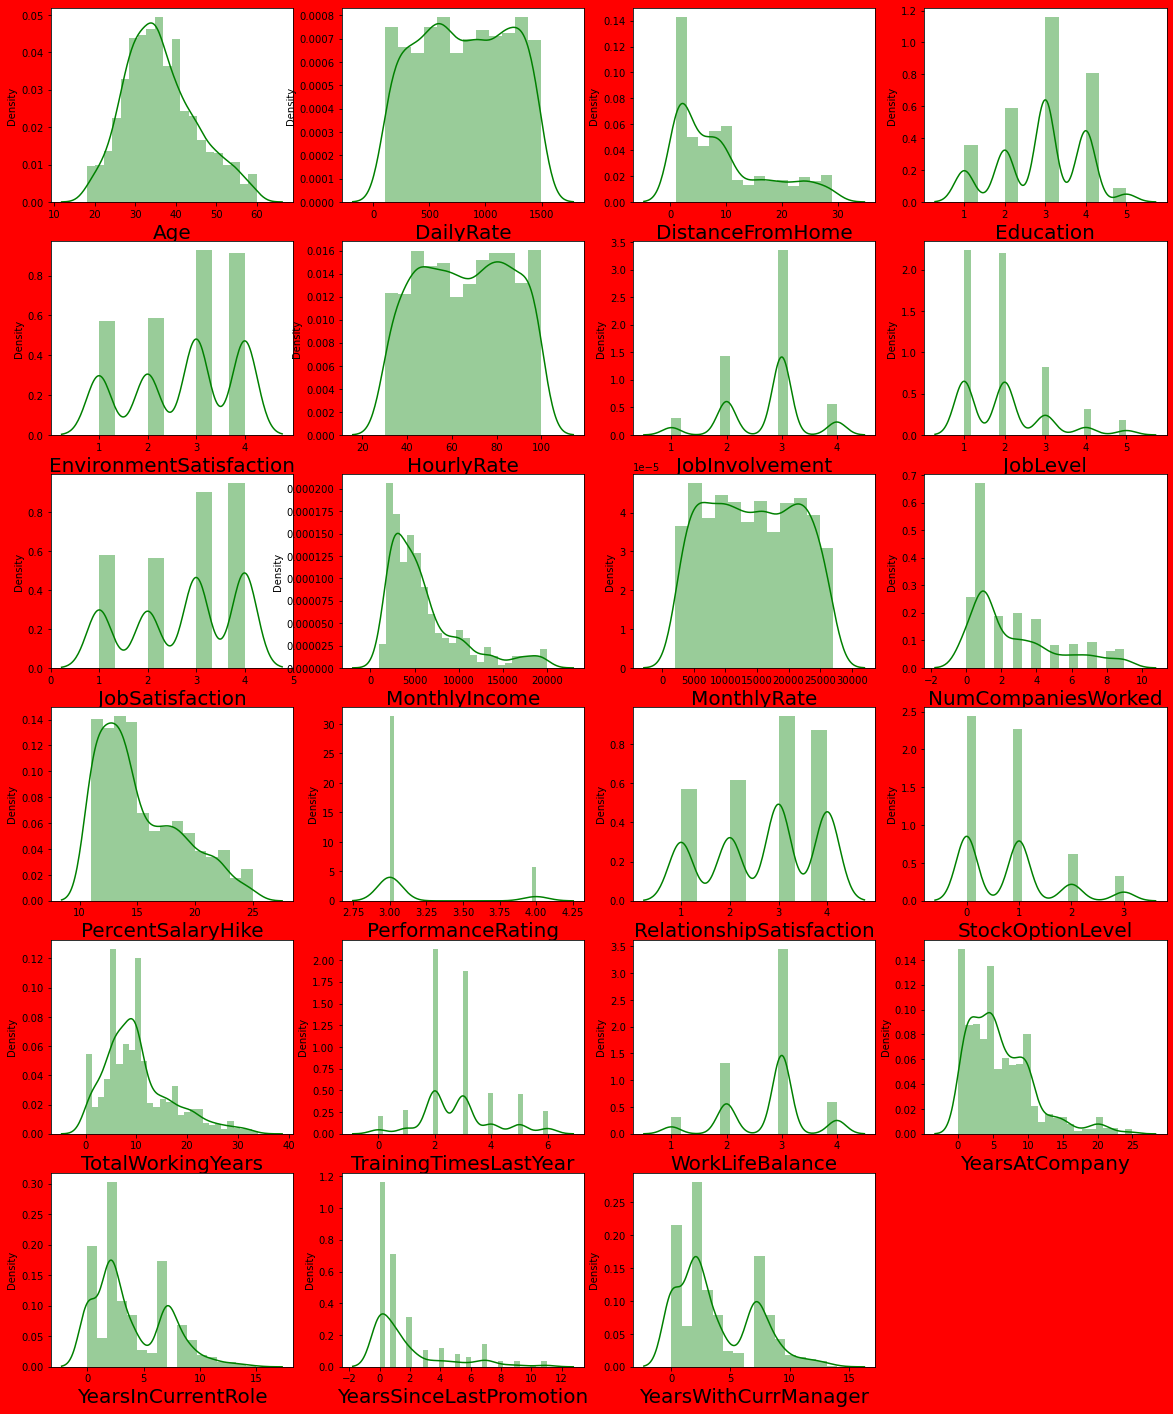

In [19]:
#Checking the skewness through Dist plot

plt.figure(figsize=(20,25), facecolor='red')
plotnumber = 1

for column in Num_data:
    if plotnumber<=23:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

By looking at the above plot, we can see that majority of the column having skewness. We will now remove the skewness through Power Transform method.

##### Removing skewness through yeo-johnson

In [10]:
# Removing skewness by using yeo-johnson method on Numerical data

from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [11]:
df[Num_data] = scaler.fit_transform(df[Num_data].values)
df[Num_data].head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.610133,0.750615,-1.489968,-0.902402,-0.712215,1.359498,0.322170,0.349828,1.186326,0.386674,...,0.0,-1.524369,-1.084263,-0.173231,-2.608524,-2.14795,0.231837,0.290524,-1.073534,0.582177
1,1.371830,-1.343372,0.244561,-1.759177,0.204826,-0.208763,-1.065841,0.349828,-0.725589,0.144235,...,0.0,1.235448,0.548653,0.147620,0.217074,0.27486,0.948319,1.006575,0.193168,1.018073
2,0.182486,1.337080,-1.028366,-0.902402,1.210036,1.267832,-1.065841,-1.141761,0.181993,-1.431153,...,0.0,-0.690386,-1.084263,-0.351153,0.217074,0.27486,-2.156089,-1.571814,-1.073534,-1.528426
3,-0.284736,1.377080,-0.698191,1.102042,1.210036,-0.458919,0.322170,-1.141761,0.181993,-0.814425,...,0.0,0.235192,-1.084263,-0.173231,0.217074,0.27486,0.621429,1.006575,1.027520,-1.528426
4,-1.080489,-0.467301,-1.028366,-1.759177,-1.522916,-1.290538,0.322170,-1.141761,-0.725589,-0.504453,...,0.0,1.235448,0.548653,-0.544046,0.217074,0.27486,-0.933983,-0.390769,0.722874,-0.347871


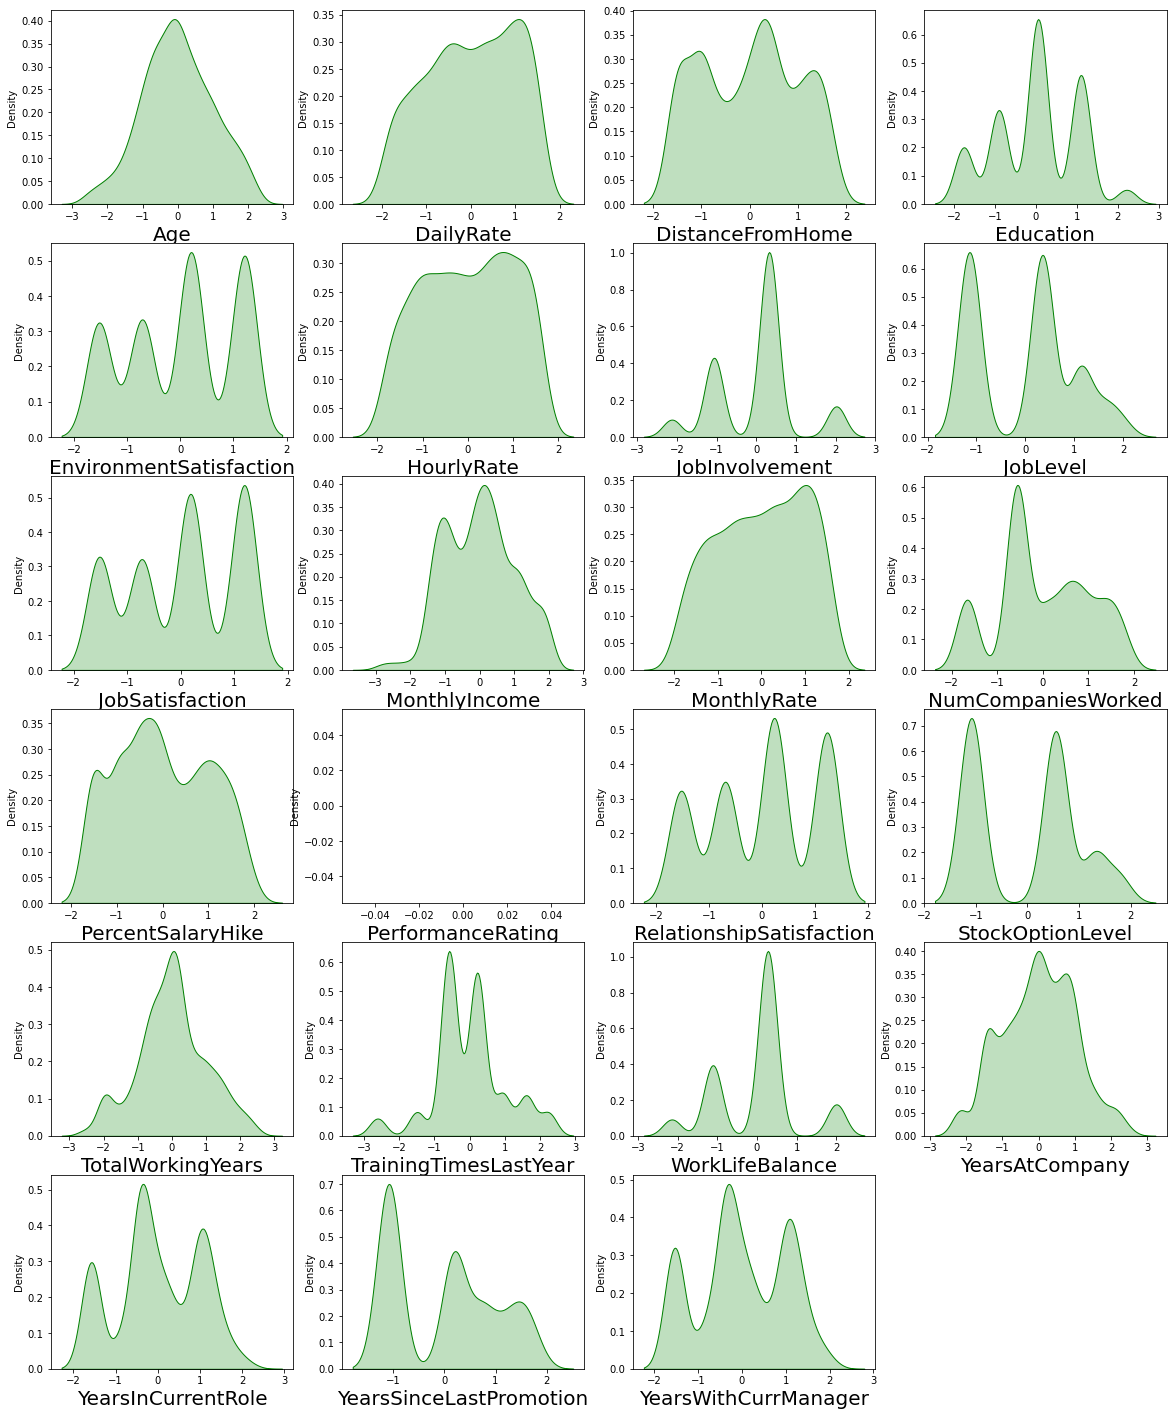

In [23]:
#Let's check the skewness again through Dist plot.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Num_data:
    if plotnumber<=23:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='g', hist=False, kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

# Data preprocessing

##### Separating the independent and target variables into x and y

In [12]:
x = df.drop('Attrition', axis=1)
y = df['Attrition']

In [16]:
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

As the target variable is imbalanced, let's balance it through Oversampling method

##### Oversampling

In [13]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [18]:
y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

From above count, we can see our data is balanced now.

##### Scaling data with standard scaler

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.765460,0.727603,0.850471,1.358636,-1.649283,-0.915373,-0.923728,-0.640074,-1.106700,1.432611,...,0.0,-1.567525,-0.921004,0.056279,-2.705319,-2.124761,0.432194,0.473117,-1.061899,0.772566
1,1.490263,-0.818387,-1.352038,-0.483636,0.177139,-1.827856,-0.923728,0.295360,0.903588,-0.229925,...,0.0,1.318587,0.764073,0.368160,0.276479,0.352937,1.149714,1.207855,0.251238,1.215221
2,0.358526,0.727603,1.467330,-0.483636,-1.163226,-0.915373,1.400815,1.320731,0.903588,1.335435,...,0.0,-0.695377,-0.921004,-0.116668,0.276479,0.352937,-1.959190,-1.437823,-1.061899,-1.370762
3,-0.086065,-0.818387,1.509402,-0.483636,-0.815558,1.219401,-0.923728,1.320731,-1.106700,-0.495120,...,0.0,0.272558,-0.921004,0.056279,0.276479,0.352937,0.822350,1.207855,1.116178,-1.370762
4,-0.843275,0.727603,-0.430564,-0.483636,-1.163226,-1.827856,0.625967,-1.467035,0.903588,-1.376732,...,0.0,1.318587,0.764073,-0.304168,0.276479,0.352937,-0.735314,-0.225956,0.800363,-0.171902


This is our scaled data using standard scaler.

##### Variance Inflation Factor(VIF)

From Heatmap we have checked there is no major multi collinearity issue . We will further check the VIF. 

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Value"]=[variance_inflation_factor(x.values, i)for i in range(len(x.columns))]
vif

,Features,VIF Value
0,Age,2.127168
1,BusinessTravel,1.019059
2,DailyRate,1.049037
3,Department,2.423151
4,DistanceFromHome,1.041554
5,Education,1.067373
6,EducationField,1.059273
7,EnvironmentSatisfaction,1.052476
8,Gender,1.040413
9,HourlyRate,1.045422


From VIF, all values are less than 10, so there is no multicollinearity problem. Now we can proceede with model building

# Modeling

##### Finding best random state¶

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score


In [16]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8589928057553957  on Random_state  53


Here we are getting accuracy score of 85.89% with Random state 53

Now splitting the data for Training and Testing purpose. 70% we are considering for Training and 30% for Testing purpose

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

## Logistic Regression

In [18]:
# Checking accuracy score for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.7841726618705036
[[281  60]
 [ 90 264]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       341
           1       0.81      0.75      0.78       354

    accuracy                           0.78       695
   macro avg       0.79      0.78      0.78       695
weighted avg       0.79      0.78      0.78       695



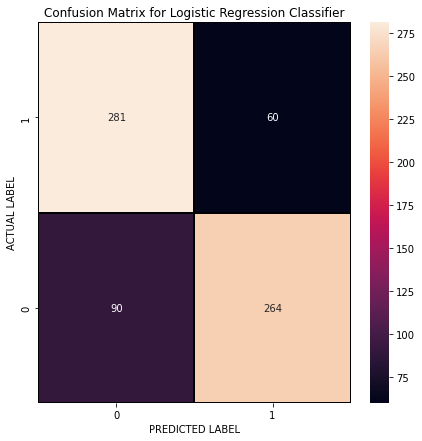

In [19]:
# Plotting confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("ACTUAL LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

## KNeighbors Classifier

In [20]:
# Checking accuracy score for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.814388489208633
[[221 120]
 [  9 345]]
              precision    recall  f1-score   support

           0       0.96      0.65      0.77       341
           1       0.74      0.97      0.84       354

    accuracy                           0.81       695
   macro avg       0.85      0.81      0.81       695
weighted avg       0.85      0.81      0.81       695



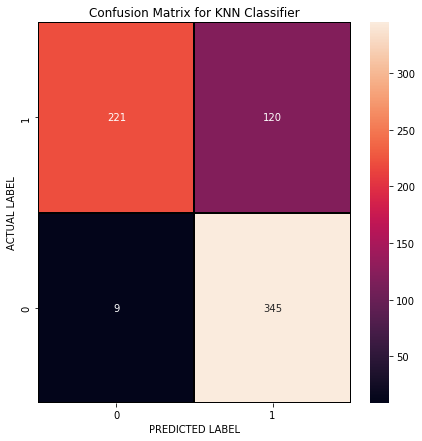

In [21]:
# Plotting confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("ACTUAL LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

## Decision Tree Classifier

In [22]:
# Checking accuracy score for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.8503597122302158
[[288  53]
 [ 51 303]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       341
           1       0.85      0.86      0.85       354

    accuracy                           0.85       695
   macro avg       0.85      0.85      0.85       695
weighted avg       0.85      0.85      0.85       695



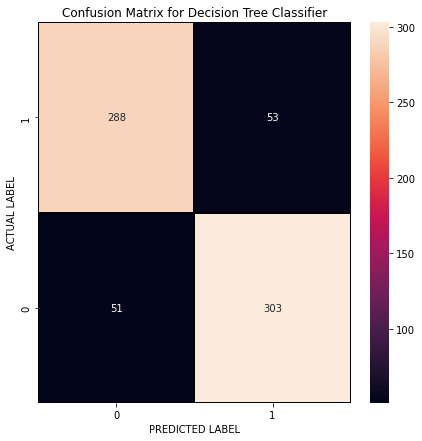

In [23]:
# Plotting confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("ACTUAL LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## Random Forest Classifier

In [24]:
# Checking accuracy score for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.9381294964028777
[[332   9]
 [ 34 320]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       341
           1       0.97      0.90      0.94       354

    accuracy                           0.94       695
   macro avg       0.94      0.94      0.94       695
weighted avg       0.94      0.94      0.94       695



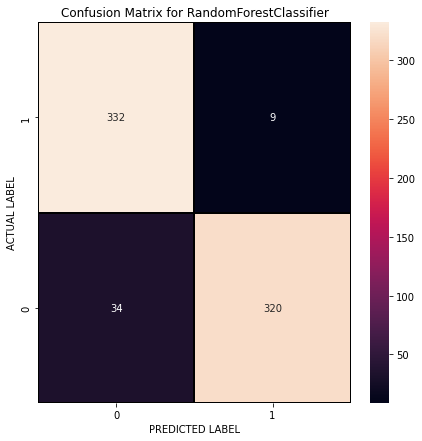

In [25]:
# Plotting confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("ACTUAL LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

## Support Vector Machine Classifier

In [26]:
# Checking accuracy score for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.9064748201438849
[[315  26]
 [ 39 315]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       341
           1       0.92      0.89      0.91       354

    accuracy                           0.91       695
   macro avg       0.91      0.91      0.91       695
weighted avg       0.91      0.91      0.91       695



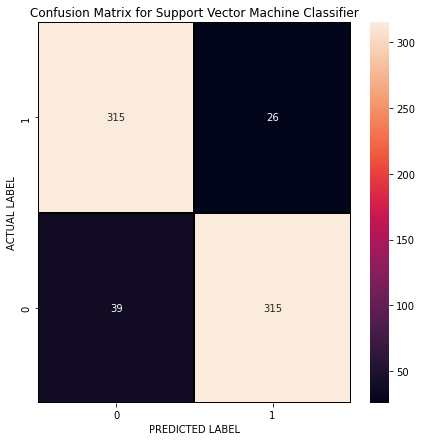

In [27]:
#Plotting confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("ACTUAL LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

## Gradient Boosting Classifier

In [28]:
# Checking accuracy score for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.9381294964028777
[[332   9]
 [ 34 320]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       341
           1       0.97      0.90      0.94       354

    accuracy                           0.94       695
   macro avg       0.94      0.94      0.94       695
weighted avg       0.94      0.94      0.94       695



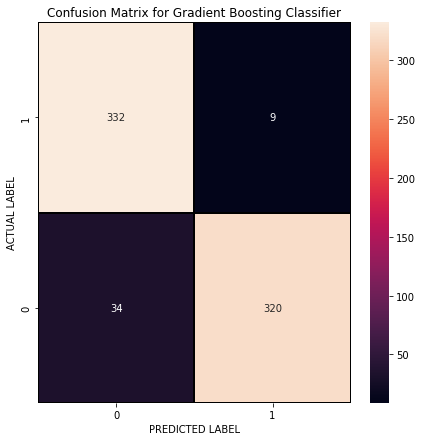

In [29]:
# Plotting confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("ACTUAL LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

## AdaBoost Classifier

In [30]:
# Checking accuracy score for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.902158273381295
[[314  27]
 [ 41 313]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       341
           1       0.92      0.88      0.90       354

    accuracy                           0.90       695
   macro avg       0.90      0.90      0.90       695
weighted avg       0.90      0.90      0.90       695



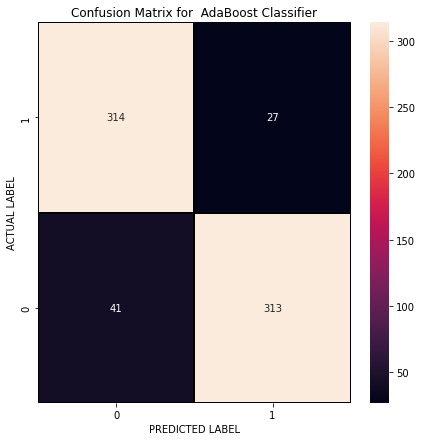

In [31]:
# Plotting confusion matrix for AdaBoost Classifier
cm = confusion_matrix(y_test,predABC)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("ACTUAL LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

### Checking the cross validation score

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.7698648246071349


In [34]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.8009635436061668


In [35]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.8221568481418039


In [36]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.9301174871527518


In [37]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.8881926342444328


In [38]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.8788104193043867


In [39]:
# cv score for AdaBoosting Classifier
print(cross_val_score(ABC,x,y,cv=5).mean())

0.8567662173233037


From the above observation, looking at the accuracy score and the cross validation score we conclude that Random Forest Classifier is our best fitting model

# Hyperparameter tuning

In [40]:
from sklearn.model_selection import GridSearchCV

In [42]:
# Random Forest classifier
parameters = {'n_estimators': [40, 80, 120, 160, 200, 240, 280],
                'criterion':['gini', 'entropy'],
                'max_depth': [2, 4, 6, 8, 10],
                'min_samples_leaf': [1, 5, 10],
                'max_features': ['auto', 'sqrt'],
                'bootstrap': [True, False]
              }

In [43]:
GCV = GridSearchCV(RandomForestClassifier(), parameters, cv=5)

In [44]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [40, 80, 120, 160, 200, 240, 280]})

In [45]:
GCV.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 160}

In [47]:
Attrition = RandomForestClassifier(bootstrap="False", criterion= 'entropy', max_depth=10, max_features= 'sqrt', min_samples_leaf=1, n_estimators= 160)
Attrition.fit(x_train, y_train)
pred = Attrition.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

93.81294964028777


After Hyperparameter Tuning, accuracy score is 93.81%

### Plotting ROC-AUC curve 

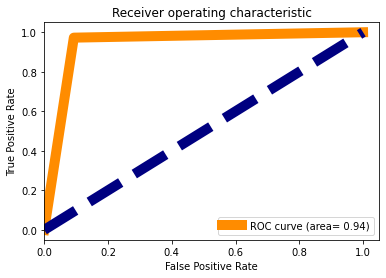

In [48]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(pred, y_test)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=10, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Saving the model

In [49]:
# Saving the model using .pkl
import joblib
joblib.dump(Attrition,"HR analytics & Attrition.pkl")

['HR analytics & Attrition.pkl']

Saving the best classification model using the joblib library.